# Build some toy models and how to sample them

In [1]:
# use autoreload
%load_ext autoreload
%autoreload 2

import yaml
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch

# import lightning trainer
import lightning as L
from lightning.pytorch.loggers import WandbLogger

# imports
from jepa.modules import JEA

## Explore Model Loading

In [7]:
with open("configs/9_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [8]:
model = JEA(**config)

In [9]:
for batch in model.train_dataloader():
    x, mask, pids, edge_index, edge_mask, y, events_df = batch["x"], batch["mask"], batch["pids"], batch["edge_index"], batch["edge_mask"], batch["y"], batch["event"]
    print(x.shape, mask.shape)

    break

torch.Size([200, 20, 4, 2]) torch.Size([200, 20, 4])


## Train Run

In [2]:
with open("configs/9_testing.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [3]:
model = JEA(**config)

/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /global/homes/d/danieltm/.conda/envs/jepa/lib/python ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type    | Params
----------------------------------------
0 | encoder     | Encoder | 73.3 K
1 | ema_encoder | Encoder | 73.3 K
----------------------------------------
73.3 K    Trainable params
73.3 K    Non-trainable params
146 K     Total params
0.587     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]Batch shapes: x=torch.Size([200, 20, 4, 2]), mask=torch.Size([200, 20, 4]), pids=torch.Size([200, 20]), edge_index=torch.Size([200, 190, 2]), edge_mask=torch.Size([200, 190]), y=torch.Size([200, 190])
Max edge index: 19
Distances shape: torch.Size([38000])
Sample distances: tensor([0.1228, 0.0482, 0.2403, 0.2412, 0.2637], device='cuda:0')


/global/homes/d/danieltm/.conda/envs/jepa/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 200. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


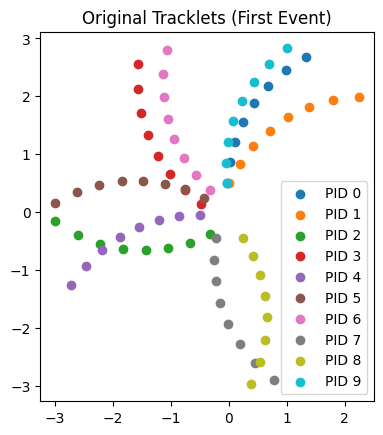

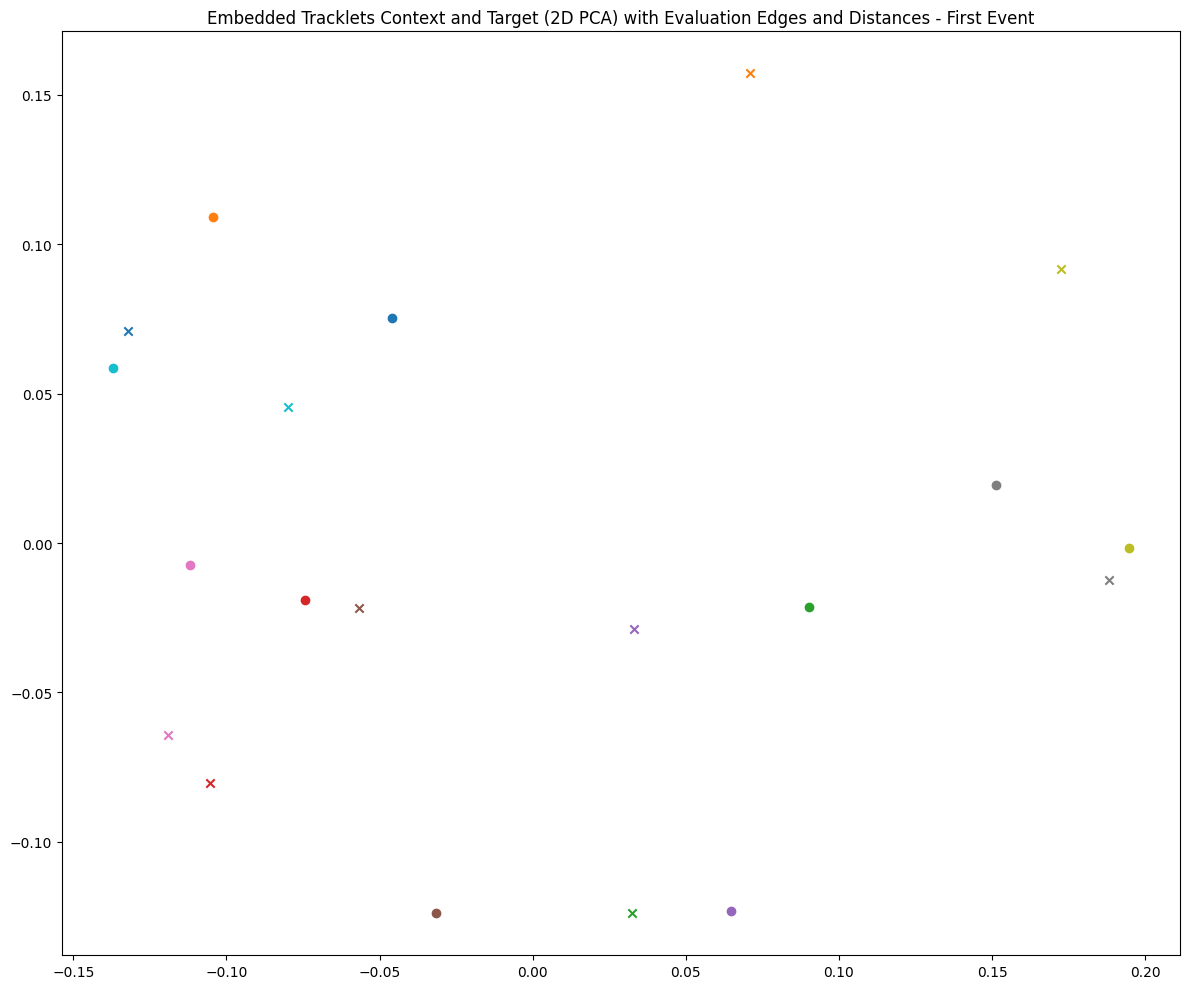

First Batch Metrics:
  Efficiency: 0.0000
  Purity: 0.0000
  Mean True Distance: 0.1261
  Mean Fake Distance: 0.2338
Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:01<00:01,  0.83it/s]Batch shapes: x=torch.Size([200, 20, 4, 2]), mask=torch.Size([200, 20, 4]), pids=torch.Size([200, 20]), edge_index=torch.Size([200, 190, 2]), edge_mask=torch.Size([200, 190]), y=torch.Size([200, 190])
Max edge index: 19
Distances shape: torch.Size([38000])
Sample distances: tensor([0.1246, 0.1526, 0.1656, 0.1398, 0.1562], device='cuda:0')
Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           Starting first training step...
Batch shapes: x=torch.Size([200, 20, 4, 2]), mask=torch.Size([200, 20, 4]), pids=torch.Size([200, 20]), edge_index=torch.Size([200, 190, 2]), edge_mask=torch.Size([200, 190]), y=torch.Size([200, 190])
Embedded context tracklets shape: torch.Size([200, 20, 8])
Embedded target tracklets shape: torch.Size([200, 20, 8])
Max edge index: 19
Embeddings 0 shape: tor

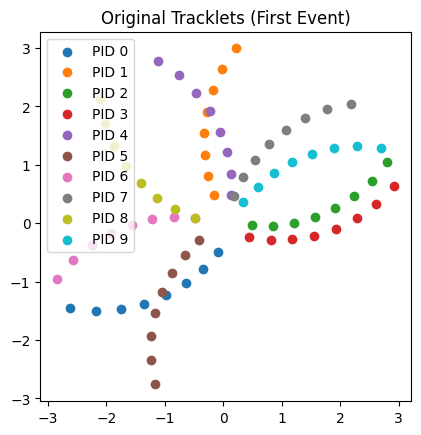

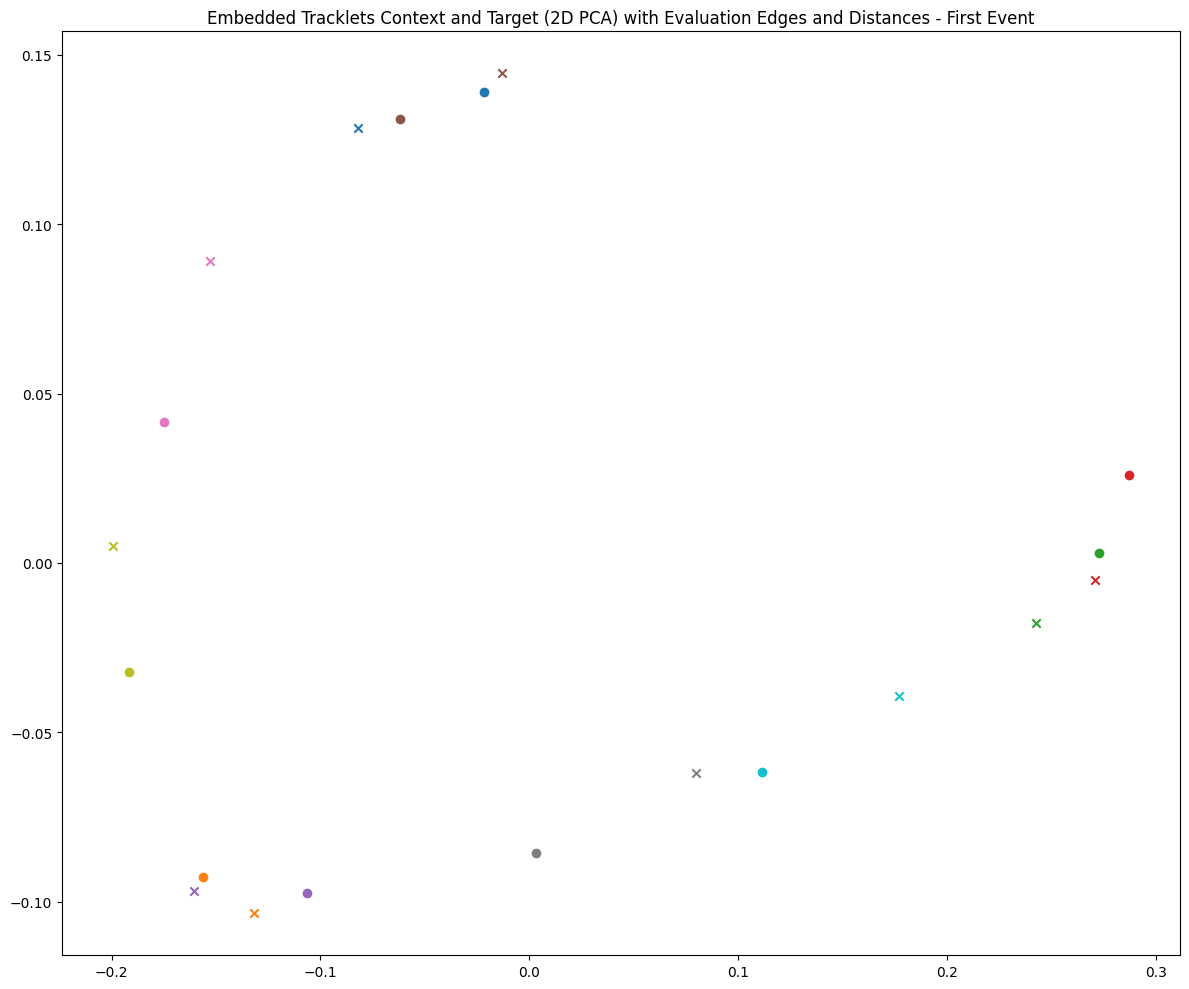

First Batch Metrics:
  Efficiency: 0.0000
  Purity: 0.0000
  Mean True Distance: 0.0554
  Mean Fake Distance: 0.2391
Epoch 1: 100%|██████████| 100/100 [00:20<00:00,  4.84it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


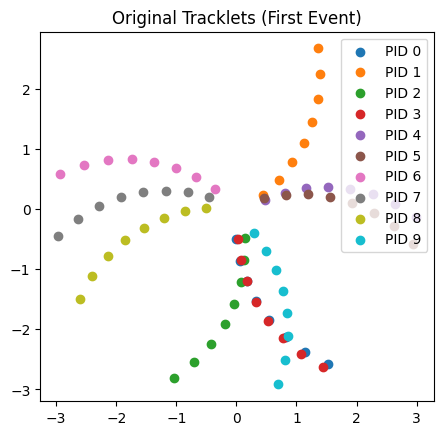

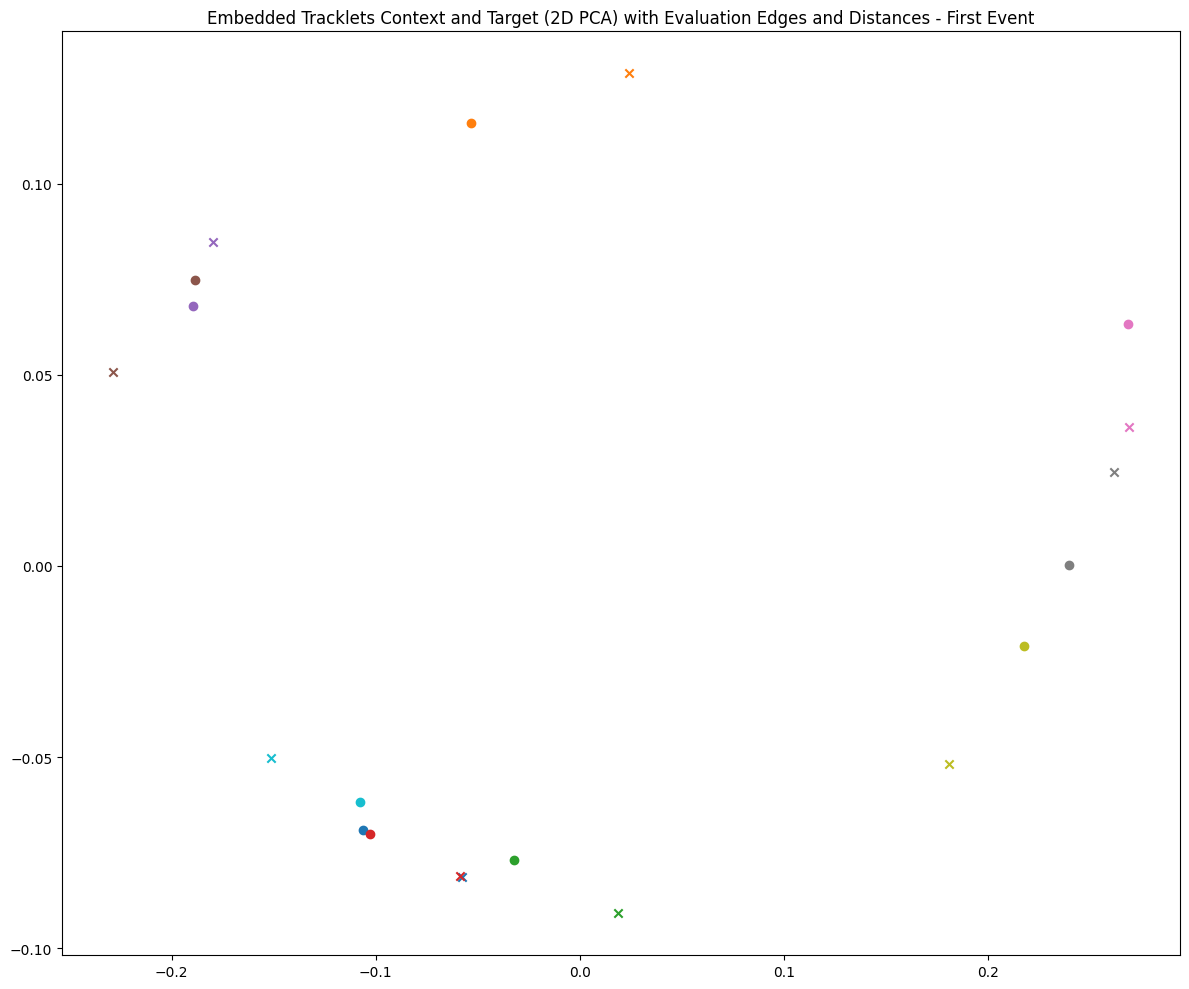

First Batch Metrics:
  Efficiency: 0.0000
  Purity: 0.0000
  Mean True Distance: 0.0454
  Mean Fake Distance: 0.2374
Epoch 2: 100%|██████████| 100/100 [00:20<00:00,  4.89it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


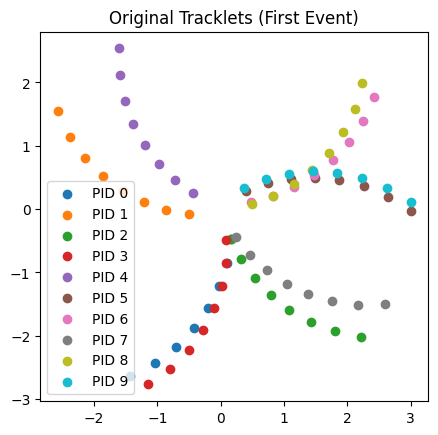

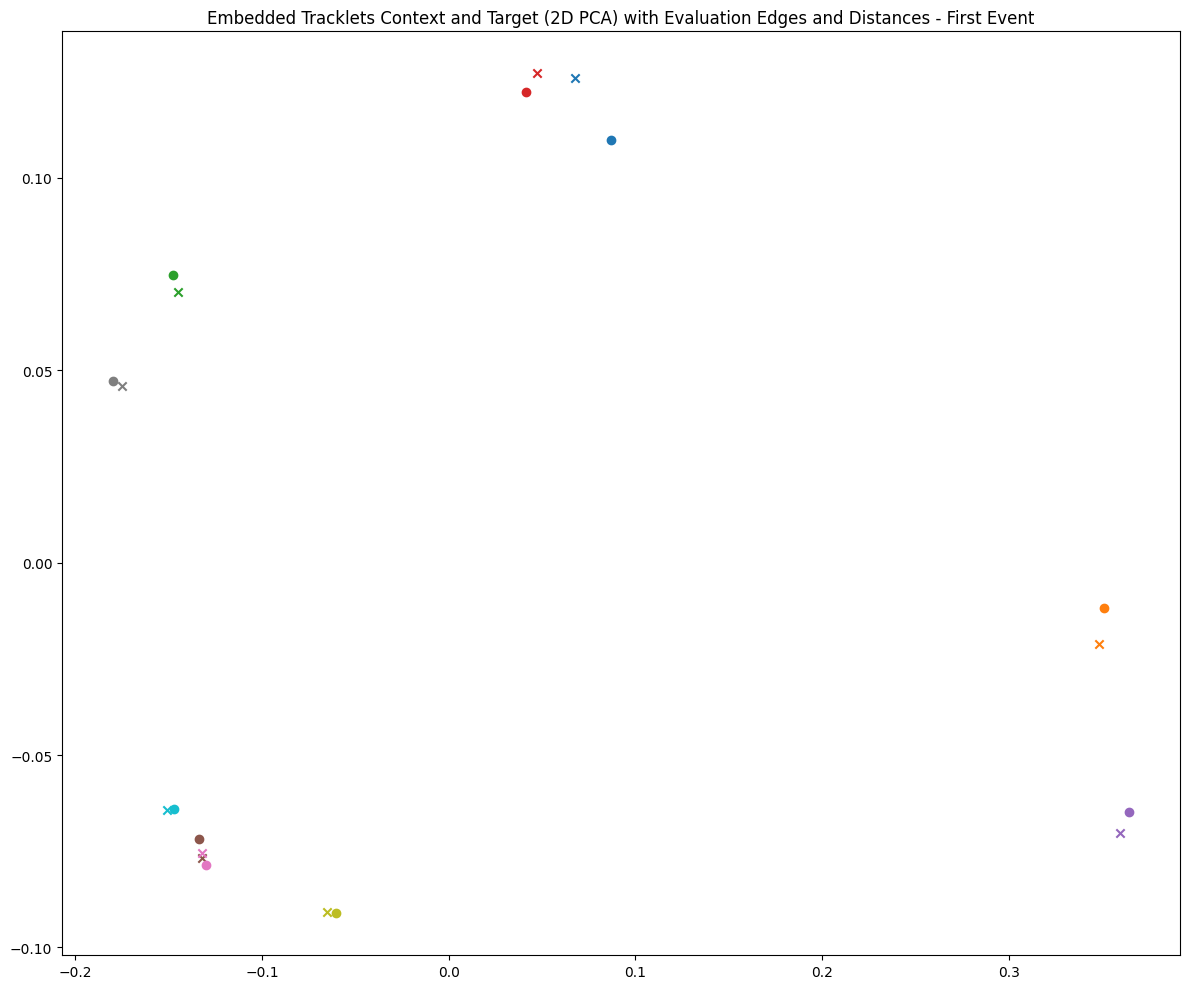

First Batch Metrics:
  Efficiency: 0.3860
  Purity: 0.8257
  Mean True Distance: 0.0118
  Mean Fake Distance: 0.2779
Epoch 3: 100%|██████████| 100/100 [00:19<00:00,  5.20it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


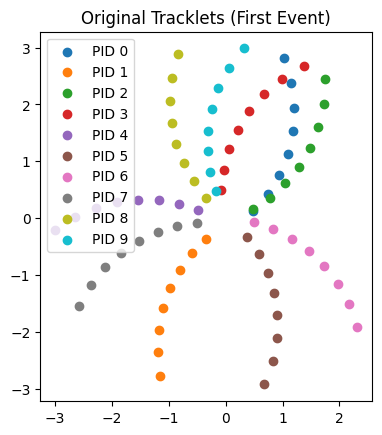

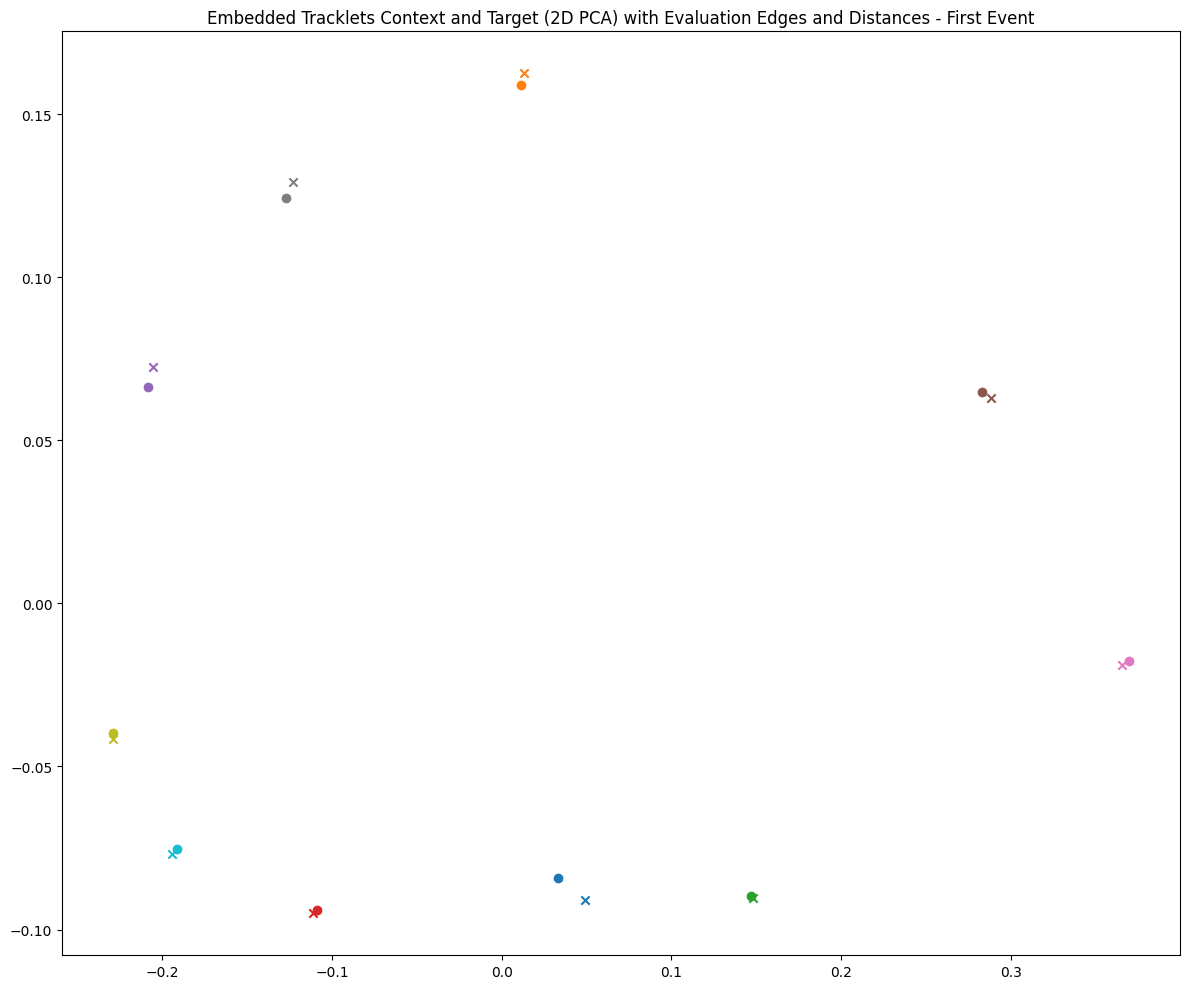

First Batch Metrics:
  Efficiency: 0.9355
  Purity: 0.8914
  Mean True Distance: 0.0061
  Mean Fake Distance: 0.2873
Epoch 4: 100%|██████████| 100/100 [00:19<00:00,  5.13it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


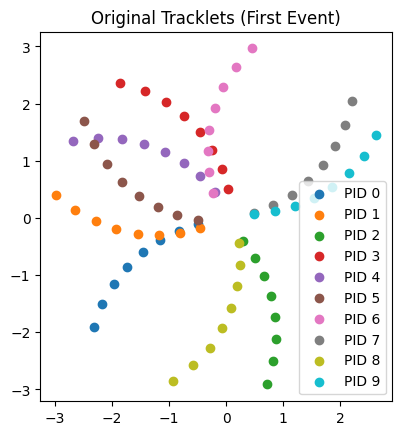

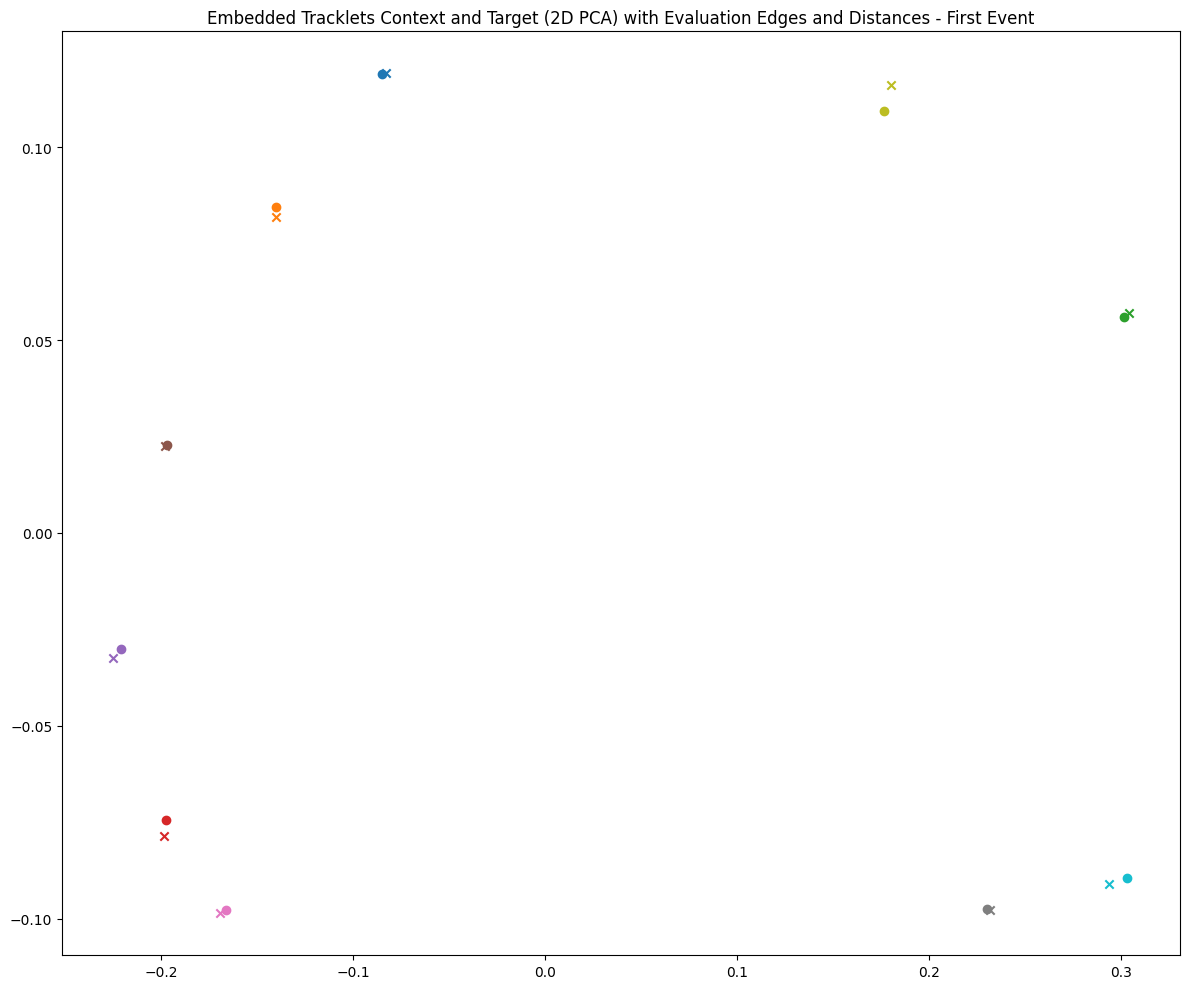

First Batch Metrics:
  Efficiency: 0.9695
  Purity: 0.8523
  Mean True Distance: 0.0044
  Mean Fake Distance: 0.2893
Epoch 5: 100%|██████████| 100/100 [00:20<00:00,  4.95it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


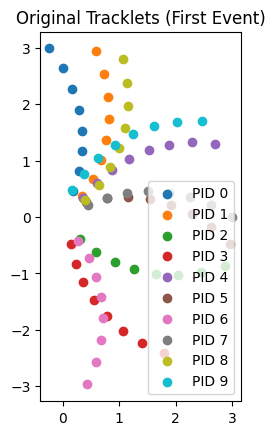

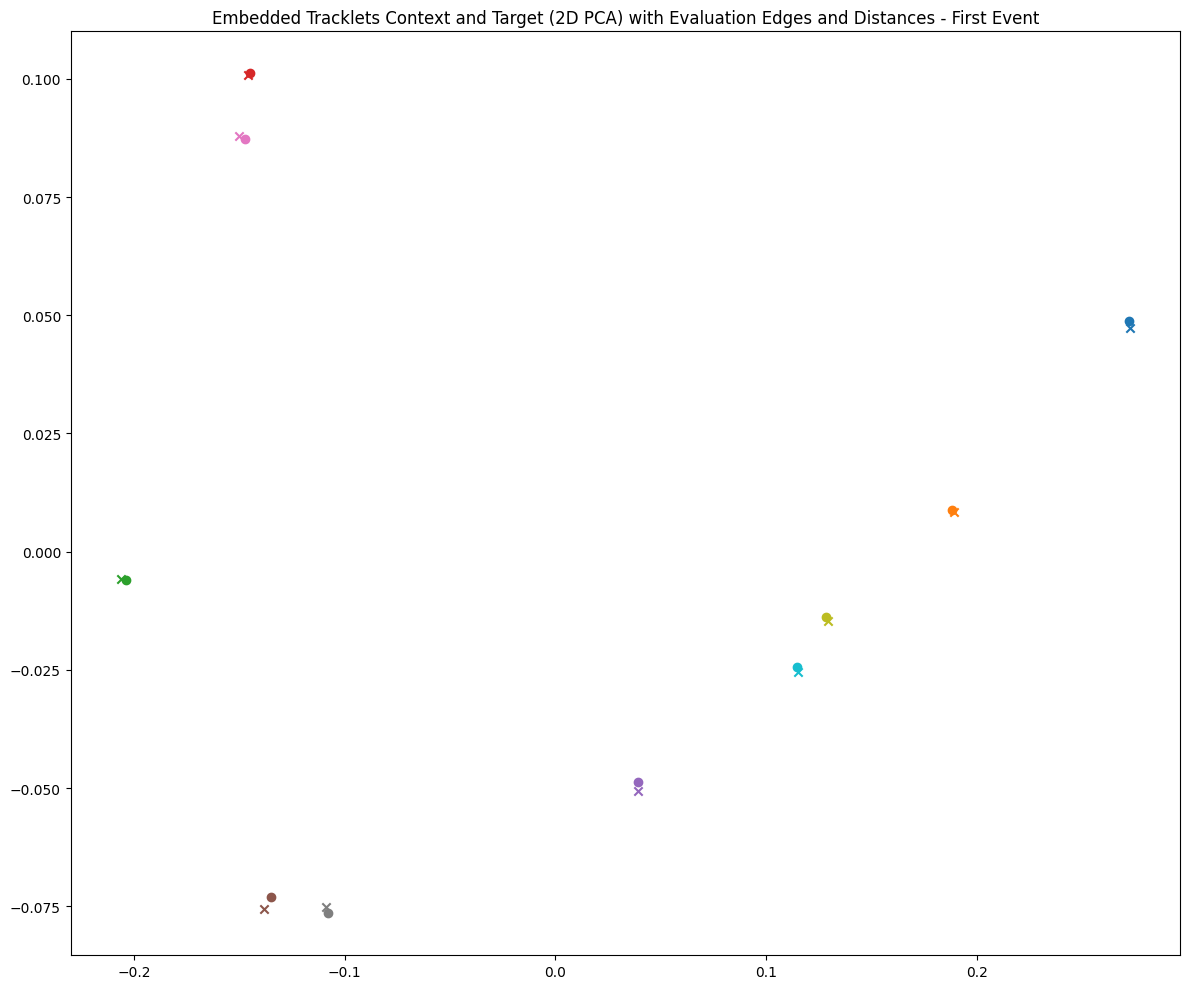

First Batch Metrics:
  Efficiency: 0.9760
  Purity: 0.8335
  Mean True Distance: 0.0038
  Mean Fake Distance: 0.2821
Epoch 6: 100%|██████████| 100/100 [00:20<00:00,  4.97it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


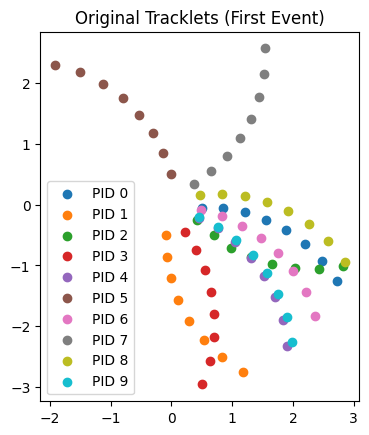

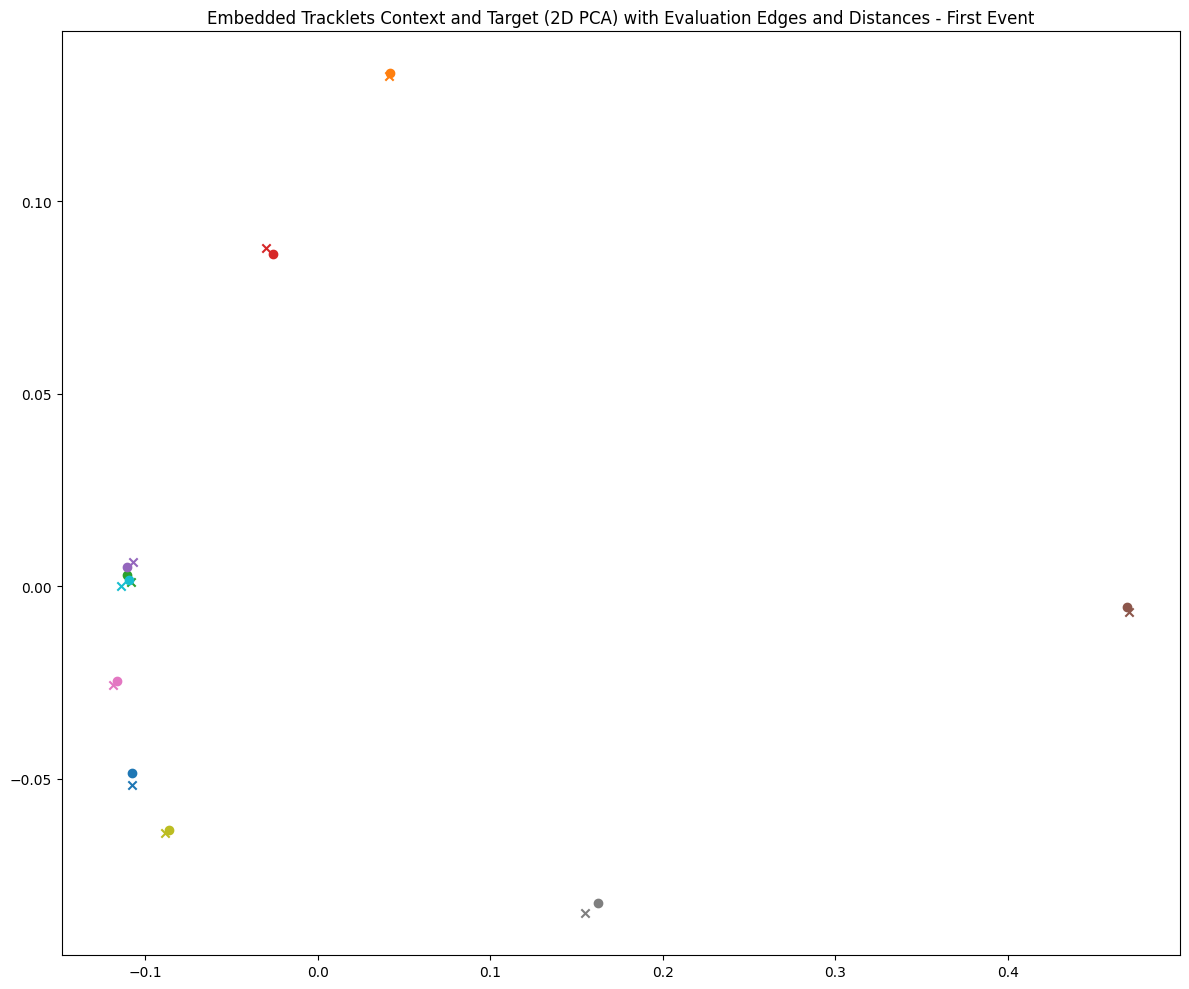

First Batch Metrics:
  Efficiency: 0.9870
  Purity: 0.8312
  Mean True Distance: 0.0033
  Mean Fake Distance: 0.2856
Epoch 7: 100%|██████████| 100/100 [00:19<00:00,  5.07it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


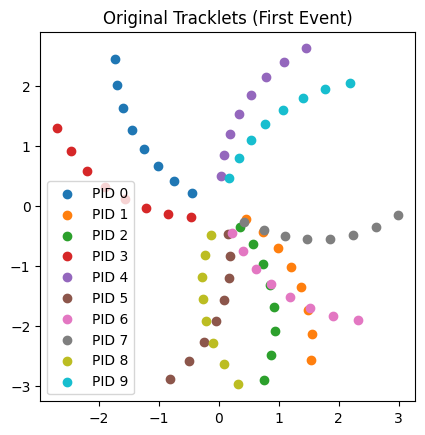

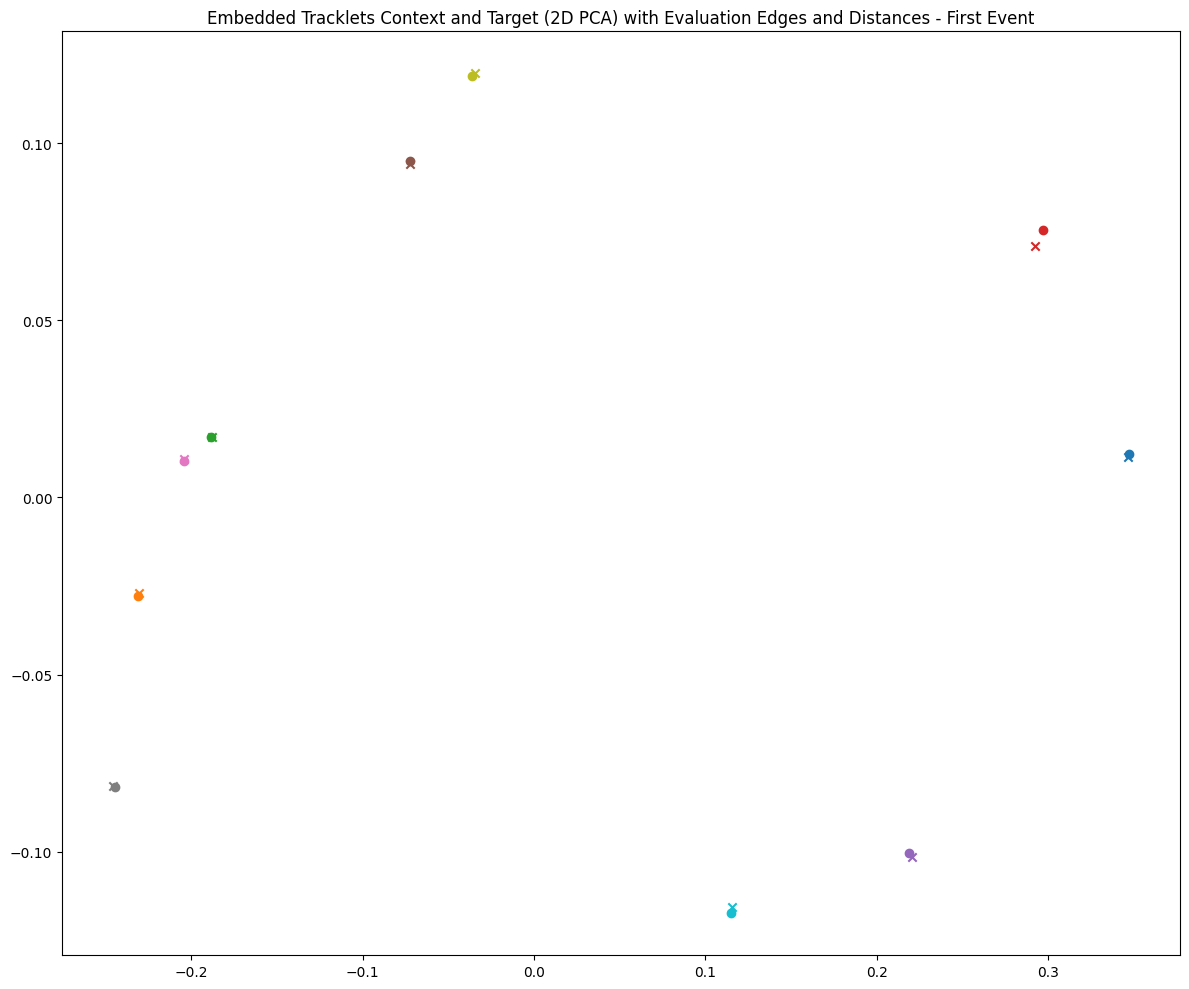

First Batch Metrics:
  Efficiency: 0.9840
  Purity: 0.8512
  Mean True Distance: 0.0032
  Mean Fake Distance: 0.2903
Epoch 8: 100%|██████████| 100/100 [00:20<00:00,  4.86it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


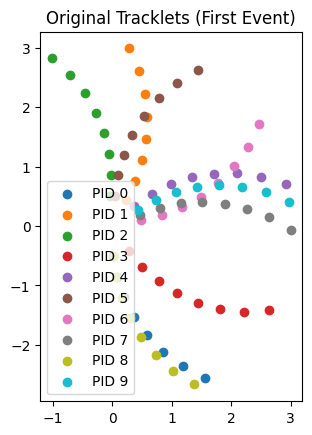

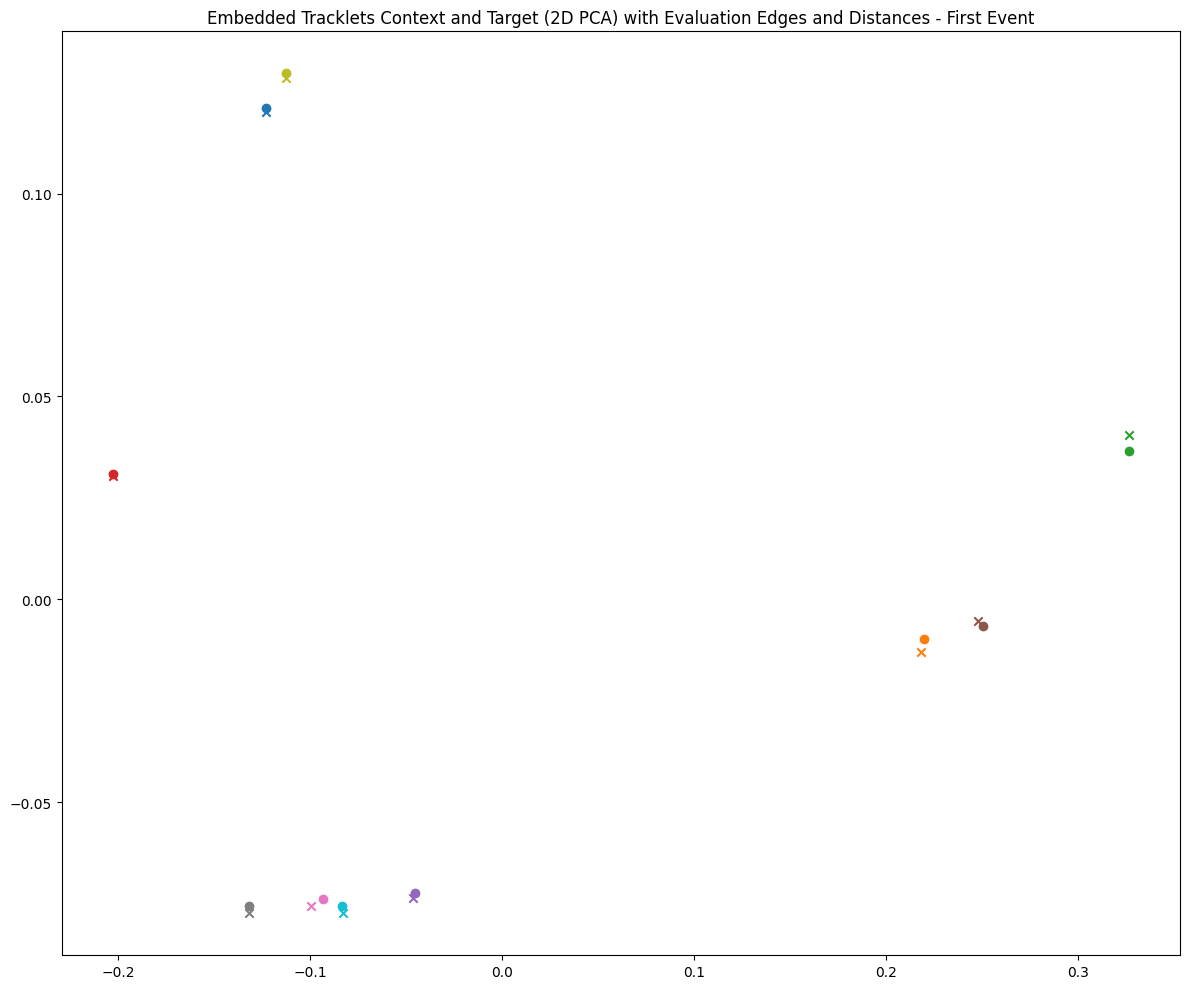

First Batch Metrics:
  Efficiency: 0.9895
  Purity: 0.8545
  Mean True Distance: 0.0030
  Mean Fake Distance: 0.2885
Epoch 9: 100%|██████████| 100/100 [00:19<00:00,  5.12it/s, v_num=2t6m]Shapes of all tensors: x_cpu=torch.Size([20, 4, 2]), pids_cpu=torch.Size([20]), edge_index_cpu=torch.Size([190, 2]), edge_mask_cpu=torch.Size([190]), edge_mask_sum=190, truth_cpu=torch.Size([190]), distances_cpu=torch.Size([190]), embedded_context_tracklets_cpu=torch.Size([20, 8]), embedded_target_tracklets_cpu=torch.Size([20, 8])


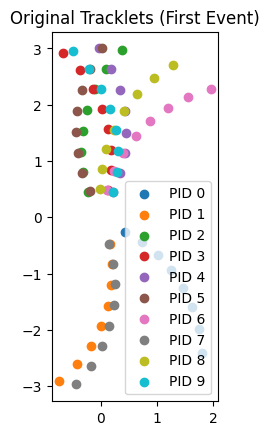

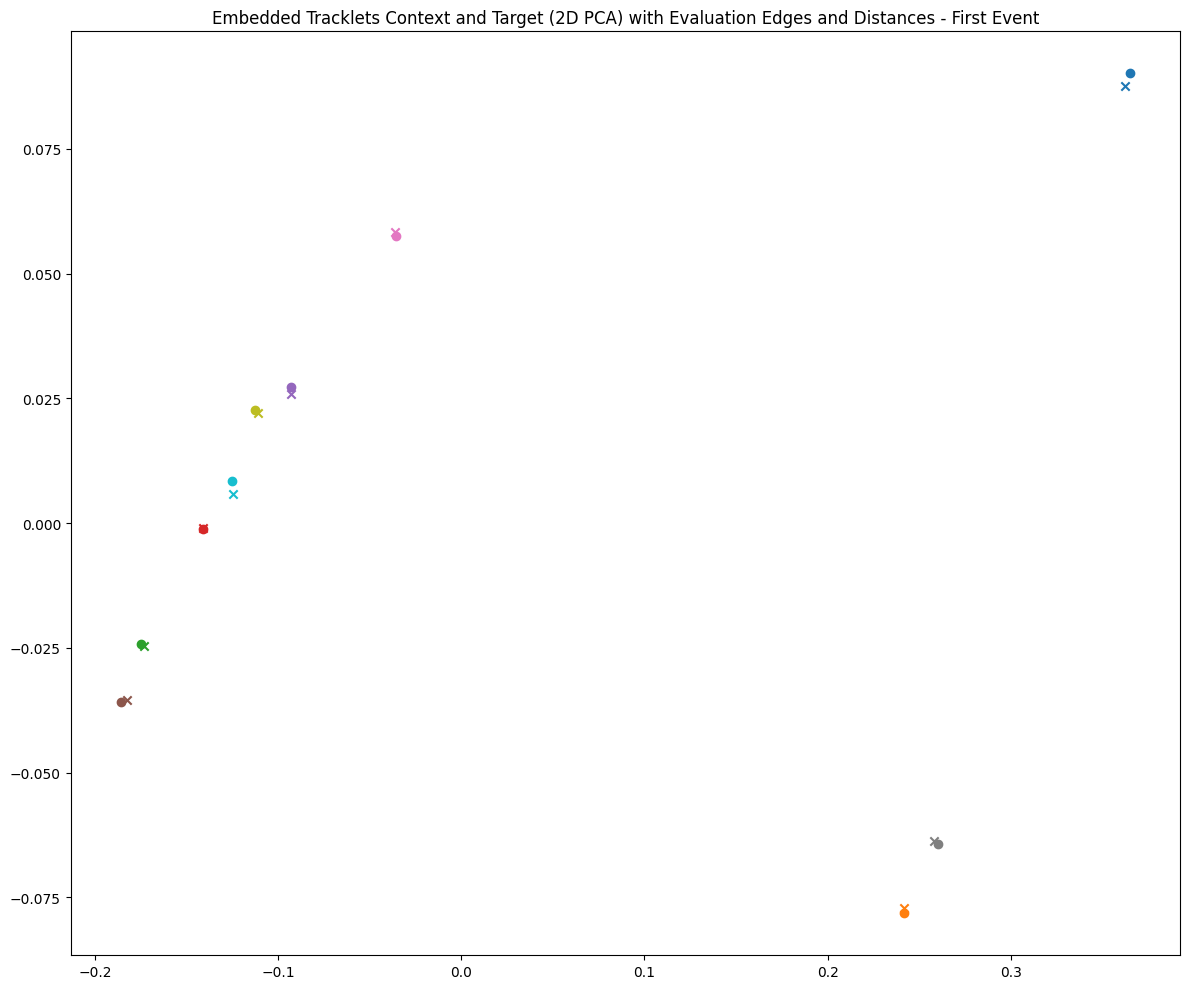

First Batch Metrics:
  Efficiency: 0.9910
  Purity: 0.8456
  Mean True Distance: 0.0030
  Mean Fake Distance: 0.2886
Epoch 9: 100%|██████████| 100/100 [00:28<00:00,  3.54it/s, v_num=2t6m]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 100/100 [00:28<00:00,  3.54it/s, v_num=2t6m]


In [4]:
wandb_logger = WandbLogger(project="JEA_toytrack_splittracks")
trainer = L.Trainer(
    max_epochs=10, 
    devices=1, 
    accelerator="gpu", 
    limit_train_batches = config["train_batches"], 
    limit_val_batches = config["val_batches"],
    logger = wandb_logger,
)
trainer.fit(model=model)

## Test Batched Edge Flipping

In [6]:
def flip_edges_randomly(edge_index, flip_prob=0.5):
    """
    Randomly flips the source and target of edge indices within each batch.

    Args:
        edge_index (torch.Tensor): Edge indices of shape [batch_size, num_edges, 2].
        edge_mask (torch.Tensor, optional): Boolean mask of shape [batch_size, num_edges]
                                            indicating valid edges. Defaults to None.
        flip_prob (float): Probability of flipping each edge. Defaults to 0.5.

    Returns:
        torch.Tensor: Flipped edge indices of shape [batch_size, num_edges, 2].
    """
    # Clone the original edge indices to avoid in-place modifications
    edge_index_flipped = edge_index.clone()

    # Generate a random mask for flipping with shape [batch_size, num_edges]
    flip_mask = torch.rand(edge_index.size(0), edge_index.size(1), device=edge_index.device) < flip_prob
    print("Initial flip_mask:\n", flip_mask)

    # Expand flip_mask to match the shape [batch_size, num_edges, 2]
    flip_mask_expanded = flip_mask.unsqueeze(-1).expand_as(edge_index_flipped)

    # Identify positions to flip (only the second dimension)
    # Create a mask that selects the second element of each edge to perform flipping
    # Using masking and advanced indexing
    # Note: In PyTorch, flipping the last dimension can be done using .flip(-1)
    edge_index_flipped = torch.where(
        flip_mask_expanded,
        edge_index_flipped.flip(-1),
        edge_index_flipped
    )

    return edge_index_flipped

In [8]:
# Define fake edge indices with batch dimension
# Example with batch_size=2, num_edges=4
edge_index = torch.tensor([
    [[0, 1],
    [2, 3],
    [4, 5],
    [6, 7]],
    [[8, 9],
    [10, 11],
    [12, 13],
    [14, 15]]
])  # Shape: [2, 4, 2]

# Optional: Define edge masks (True for valid edges, False for padding)
edge_mask = torch.tensor([
    [True, True, False, False],
    [True, False, True, False]
])  # Shape: [2, 4]

print("Original Edge Indices:")
print(edge_index)
print("\nEdge Mask:")
print(edge_mask)

# Apply random flipping
flipped_edge_index = flip_edges_randomly(edge_index, flip_prob=0.5)

print("\nFlipped Edge Indices:")
print(flipped_edge_index)

# Verify that only valid edges were potentially flipped
print("\nVerification:")
for batch in range(edge_index.size(0)):
    for edge in range(edge_index.size(1)):
        original = edge_index[batch, edge]
        flipped = flipped_edge_index[batch, edge]
        if not torch.equal(original, flipped):
            print(f"Batch {batch}, Edge {edge}: Flipped {original.tolist()} -> {flipped.tolist()}")
        else:
            print(f"Batch {batch}, Edge {edge}: Not Flipped {original.tolist()}")

Original Edge Indices:
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]]])

Edge Mask:
tensor([[ True,  True, False, False],
        [ True, False,  True, False]])
Initial flip_mask:
 tensor([[False,  True, False, False],
        [ True, False, False, False]])

Flipped Edge Indices:
tensor([[[ 0,  1],
         [ 3,  2],
         [ 4,  5],
         [ 6,  7]],

        [[ 9,  8],
         [10, 11],
         [12, 13],
         [14, 15]]])

Verification:
Batch 0, Edge 0: Not Flipped [0, 1]
Batch 0, Edge 1: Flipped [2, 3] -> [3, 2]
Batch 0, Edge 2: Not Flipped [4, 5]
Batch 0, Edge 3: Not Flipped [6, 7]
Batch 1, Edge 0: Flipped [8, 9] -> [9, 8]
Batch 1, Edge 1: Not Flipped [10, 11]
Batch 1, Edge 2: Not Flipped [12, 13]
Batch 1, Edge 3: Not Flipped [14, 15]
